# Detector Gain

You could calculate the mean of each flat image manually using IRAF. Alternatively, you could calculate the means for all of the images automatically using Python.

In [10]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# glob serves some of the same functions as ls in the terminal
import glob
from astropy.table import Table

## FITS Headers
The headers of the FITS files contain the exposure times of the flat images. Now we use `fits.open` instead of `fits.getdata`. HDU stands for Header/Data Unit.

In [18]:
hdu = fits.open('CCD/slitview.00000359.FLAT.FIT')
header = hdu[0].header
print(header['exposure'])

6.0


## Calculating Mean Counts
We can find all of the flat images, assuming they all have 'Flat' in the name.
#### You will need to change the path to the directory containing your data.

In [6]:
# This is equivalent to $ ls Flat*.fits
flat_list = glob.glob('CCD/Pencil*.FIT')
print(flat_list)

['CCD/Pencil105.FLAT.FIT', 'CCD/Pencil75.FLAT.FIT', 'CCD/Pencil90.FLAT.FIT', 'CCD/Pencil15.FLAT.FIT', 'CCD/Pencil0.625.FLAT.FIT', 'CCD/Pencil1.25.FLAT.FIT', 'CCD/Pencil65.FLAT.FIT', 'CCD/Pencil0.3125.FLAT.FIT', 'CCD/Pencil0.16.FLAT.FIT', 'CCD/Pencil85.FLAT.FIT', 'CCD/Pencil5.FLAT.FIT', 'CCD/Pencil55.FLAT.FIT', 'CCD/Pencil35.FLAT.FIT', 'CCD/Pencil95.FLAT.FIT', 'CCD/Pencil45.FLAT.FIT', 'CCD/Pencil2.5.FLAT.FIT', 'CCD/Pencil25.FLAT.FIT']


Now we can loop through each flat image, and keep track of the exposure time and mean counts

In [7]:
# These are empty lists (arrays) to store the exposure times and mean counts
exposure = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exposure']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exposure.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exposure)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exposure)
exposure = np.array([exposure[i] for i in time_sort])
means = np.array([means[i] for i in time_sort])

Exposure time 105.0 sec
Mean counts: 34076.27

Exposure time 75.0 sec
Mean counts: 31235.74

Exposure time 90.0 sec
Mean counts: 32542.03

Exposure time 15.0 sec
Mean counts: 6514.27

Exposure time 0.63 sec
Mean counts: 402.87

Exposure time 1.25 sec
Mean counts: 698.58

Exposure time 65.0 sec
Mean counts: 27911.69

Exposure time 0.31 sec
Mean counts: 260.67

Exposure time 0.16 sec
Mean counts: 185.59

Exposure time 85.0 sec
Mean counts: 33109.37

Exposure time 5.0 sec
Mean counts: 1912.06

Exposure time 55.0 sec
Mean counts: 23804.44

Exposure time 35.0 sec
Mean counts: 15383.94

Exposure time 95.0 sec
Mean counts: 32454.10

Exposure time 45.0 sec
Mean counts: 19442.49

Exposure time 2.5 sec
Mean counts: 1255.83

Exposure time 25.0 sec
Mean counts: 11222.69



## Plot mean counts versus exposure time


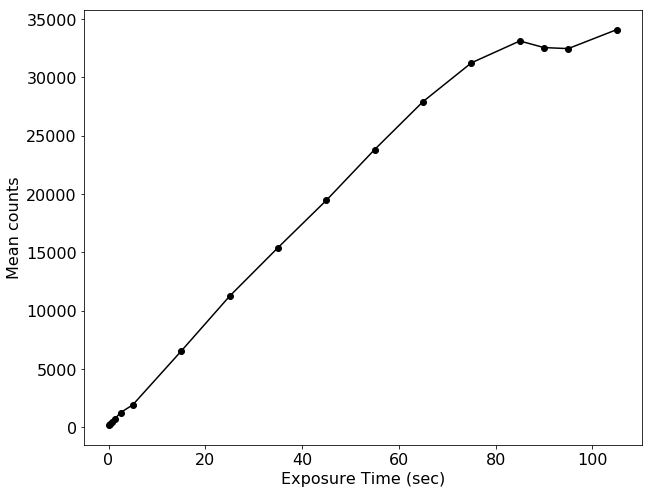

In [15]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(exposure, means, '-ko')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts')
#plt.show()
plt.savefig('ExposurevsCounts.png')

col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.16,0.31,0.63,1.25,2.5,5.0,15.0,25.0,35.0,45.0,55.0,65.0,75.0,85.0,90.0,95.0,105.0
